# Encoding in Machine Learning

Scaling 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
cancerset=load_breast_cancer()

In [4]:
cancerset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
cancerset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
cancerset.values()

dict_values([array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       

In [10]:
cancerset.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [11]:
cancerset.data.shape

(569, 30)

In [14]:
df_cancer=pd.DataFrame(cancerset.data)

In [15]:
df_cancer

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
# pd.dataframe?


In [18]:
df_cancer.to_csv('cancerfile.csv')

In [19]:
df_cancer['target']=pd.DataFrame(data=cancerset.target)

df_cancer

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [20]:
df_cancer.tail(7)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [21]:
df_cancer.sample()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
204,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875,1


In [22]:
df_cancer.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
247,12.89,14.11,84.95,512.2,0.0876,0.1346,0.1374,0.03980,0.1596,0.06409,...,17.70,105.0,639.1,0.1254,0.5849,0.7727,0.1561,0.2639,0.11780,1
501,13.82,24.49,92.33,595.9,0.1162,0.1681,0.1357,0.06759,0.2275,0.07237,...,32.94,106.0,788.0,0.1794,0.3966,0.3381,0.1521,0.3651,0.11830,0
213,17.42,25.56,114.50,948.0,0.1006,0.1146,0.1682,0.06597,0.1308,0.05866,...,28.07,120.4,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818,0


In [23]:
# sns.pairplot(df_cancer)

In [24]:
# sns.pairplot(df_cancer,hue='target')

<AxesSubplot:xlabel='target', ylabel='count'>

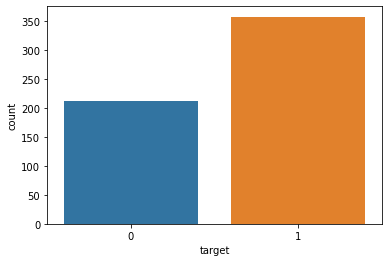

In [26]:
sns.countplot(df_cancer['target'])

<AxesSubplot:>

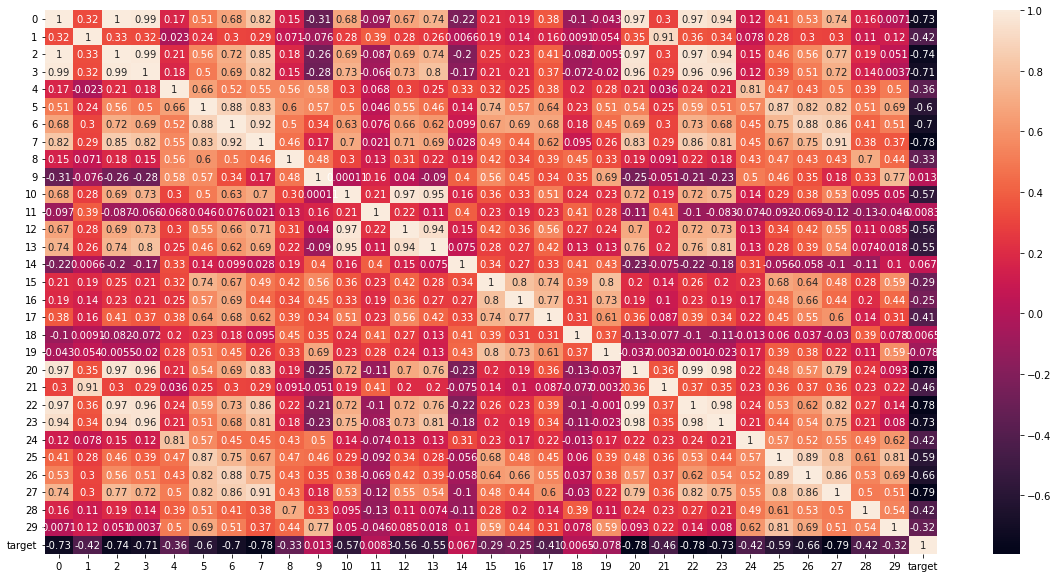

In [27]:
plt.figure(figsize=(20,10))

sns.heatmap(df_cancer.corr(),annot=True)

In [90]:
x=df_cancer.drop(['target'],axis=1)

In [91]:
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [92]:
y=df_cancer['target']

In [93]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [94]:
x.shape

(569, 30)

In [95]:
y.shape

(569,)

In [96]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=45)

In [97]:
train_x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
50,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,...,12.98,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
313,11.54,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,0.1833,0.06100,...,12.34,12.87,81.23,467.8,0.10920,0.16260,0.08324,0.04715,0.3390,0.07434
305,11.60,24.49,74.23,417.2,0.07474,0.05688,0.01974,0.013130,0.1935,0.05878,...,12.44,31.62,81.39,476.5,0.09545,0.13610,0.07239,0.04815,0.3244,0.06745
18,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.094980,0.1582,0.05395,...,27.32,30.88,186.80,2398.0,0.15120,0.31500,0.53720,0.23880,0.2768,0.07615
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.073640,0.2303,0.07077,...,17.46,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410
377,13.46,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.011170,0.1421,0.05763,...,14.69,35.63,97.11,680.6,0.11080,0.14570,0.07934,0.05781,0.2694,0.07061
163,12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.028220,0.1551,0.06761,...,13.58,28.68,87.36,553.0,0.14520,0.23380,0.16880,0.08194,0.2268,0.09082
544,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.023690,0.1620,0.06688,...,15.05,24.75,99.17,688.6,0.12640,0.20370,0.13770,0.06845,0.2249,0.08492


In [98]:
train_x.shape

(455, 30)

In [99]:
test_x.shape

(114, 30)

In [100]:
train_y

50     1
313    1
305    1
18     0
8      0
      ..
15     0
377    1
163    1
544    1
414    0
Name: target, Length: 455, dtype: int32

In [101]:
train_y.shape

(455,)

In [102]:
test_y

440    1
262    0
260    0
145    1
504    1
      ..
415    1
246    1
493    1
329    0
4      0
Name: target, Length: 114, dtype: int32

In [103]:
test_y.shape

(114,)

In [104]:
lg=LogisticRegression()

In [105]:
lg.fit(train_x,train_y)

LogisticRegression()

In [106]:
pred=lg.predict(test_x)

In [107]:
pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0])

In [108]:
print('accuracy_score:',accuracy_score(test_y,pred))

accuracy_score: 0.956140350877193


In [109]:
print(confusion_matrix(test_y,pred))

[[38  4]
 [ 1 71]]


In [110]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

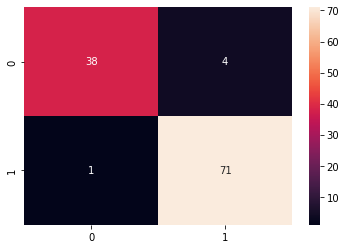

In [111]:
p=confusion_matrix(test_y,pred)
sns.heatmap(p,annot=True)

# Scaling Techniques

Standard Scaling

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [114]:
xf=pd.DataFrame(data=x)
print(xf)

xf.to_csv('cancerstandard.csv')

           0         1         2         3         4         5         6   \
0    1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1    1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2    1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3   -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4    1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   
..        ...       ...       ...       ...       ...       ...       ...   
564  2.110995  0.721473  2.060786  2.343856  1.041842  0.219060  1.947285   
565  1.704854  2.085134  1.615931  1.723842  0.102458 -0.017833  0.693043   
566  0.702284  2.045574  0.672676  0.577953 -0.840484 -0.038680  0.046588   
567  1.838341  2.336457  1.982524  1.735218  1.525767  3.272144  3.296944   
568 -1.808401  1.221792 -1.814389 -1.347789 -3.112085 -1.150752 -1.114873   

           7         8         9   ...        20        21        22  \
0  

In [115]:
x.mean()

-6.118909323768877e-16

In [87]:
x.std()

1.0

In [116]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=45)

In [117]:
train_x

array([[-0.67234446,  0.5376343 , -0.71049114, ..., -1.17939473,
        -0.75672612, -1.01498598],
       [-0.73482758, -1.99421473, -0.75126944, ..., -1.02712875,
         0.79148992, -0.53231421],
       [-0.71778673,  1.2101567 , -0.73067434, ..., -1.01190215,
         0.55529395, -0.9141292 ],
       ...,
       [-0.50761623,  0.68191246, -0.49918541, ..., -0.49739543,
        -1.02365992,  0.38093846],
       [-0.07307451,  0.32819826, -0.09057863, ..., -0.70280223,
        -1.05439775,  0.05398513],
       [ 0.28478338,  2.44815641,  0.19528136, ..., -0.74391404,
         0.53749837, -1.23554094]])

In [118]:
test_x

array([[-0.89671568, -0.48627523, -0.83364984, ...,  0.62267307,
        -0.5836236 ,  0.63030964],
       [ 0.89825404,  0.66096886,  0.92393601, ...,  0.58156126,
         0.26894679, -0.50460631],
       [ 1.75597692,  1.80821295,  1.68595471, ...,  0.83889076,
         0.40484036, -0.21921485],
       ...,
       [-0.47353452, -1.50320357, -0.54119942, ..., -1.33699001,
        -1.00424655, -0.75730243],
       [ 0.60571942,  0.60279218,  0.63972362, ..., -0.15083807,
        -0.2665386 , -0.24470612],
       [ 1.75029663, -1.15181643,  1.77657315, ...,  0.72925926,
        -0.86835298, -0.39709962]])

In [119]:
train_y

50     1
313    1
305    1
18     0
8      0
      ..
15     0
377    1
163    1
544    1
414    0
Name: target, Length: 455, dtype: int32

In [120]:
test_y

440    1
262    0
260    0
145    1
504    1
      ..
415    1
246    1
493    1
329    0
4      0
Name: target, Length: 114, dtype: int32

In [121]:
lg.fit(train_x,train_y)

LogisticRegression()

In [122]:
pred=lg.predict(test_x)

In [123]:
pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0])

In [124]:
print('accuracy_score:',accuracy_score(test_y,pred))

accuracy_score: 0.9824561403508771


In [125]:
print(confusion_matrix(test_y,pred))

[[40  2]
 [ 0 72]]


In [127]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<AxesSubplot:>

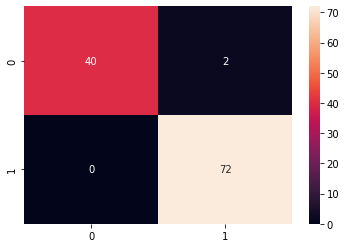

In [128]:
p=confusion_matrix(test_y,pred)

sns.heatmap(p,annot=True)

In [423]:
p=np.array([1.0970639814699807,-2.0733350146975935,1.2699336881399383,0.9843749048031144,1.568466329243428,3.2835146709868264,2.652873983743168,2.532475216403245,2.2175150059646405,2.255746885296269,2.4897339267376193,-0.5652650590684639,2.833030865855184,2.4875775569611043,-0.21400164666895383,1.3168615683959484,0.72402615808036,0.6608199414286064,1.1487566671861758,0.9070830809973359,1.8866896251792757,-1.3592934737640827,2.3036006236225606,2.0012374893299207,1.3076862710715387,2.616665023512603,2.1095263465722556,2.296076127561788,2.750622244124955,1.9370146123781782])


cancerpredict(p)

[0]
not suffring from cancer


# MinMax Scaler

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
st=MinMaxScaler()
x=st.fit_transform(x)
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [134]:
sf=pd.DataFrame(data=x)
print(sf)
sf.to_csv('cancerMinMax.csv')

           0         1         2         3         4         5         6   \
0    0.521037  0.022658  0.545989  0.363733  0.593753  0.792037  0.703140   
1    0.643144  0.272574  0.615783  0.501591  0.289880  0.181768  0.203608   
2    0.601496  0.390260  0.595743  0.449417  0.514309  0.431017  0.462512   
3    0.210090  0.360839  0.233501  0.102906  0.811321  0.811361  0.565604   
4    0.629893  0.156578  0.630986  0.489290  0.430351  0.347893  0.463918   
..        ...       ...       ...       ...       ...       ...       ...   
564  0.690000  0.428813  0.678668  0.566490  0.526948  0.296055  0.571462   
565  0.622320  0.626987  0.604036  0.474019  0.407782  0.257714  0.337395   
566  0.455251  0.621238  0.445788  0.303118  0.288165  0.254340  0.216753   
567  0.644564  0.663510  0.665538  0.475716  0.588336  0.790197  0.823336   
568  0.036869  0.501522  0.028540  0.015907  0.000000  0.074351  0.000000   

           7         8         9   ...        20        21        22  \
0  

In [135]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=45)

In [136]:
lg.fit(train_x,train_y)

LogisticRegression()

In [137]:
print('accuracy_score:',accuracy_score(test_y,pred))

accuracy_score: 0.9824561403508771


In [138]:
print(confusion_matrix(test_y,pred))

[[40  2]
 [ 0 72]]


In [139]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [420]:
def cancerpredict(p):
    p=p.reshape(1,-1)
    t=lg.predict(p)
    print(t)
    
    print('not suffring from cancer')

In [424]:
p=np.array([0.5210374366983765,0.022658099425092948,0.5459885287817013,0.3637327677624602,0.5937528211609642,0.7920372983252562,0.7031396438612934,0.7311133200795228,0.6863636363636365,0.6055181128896379,0.3561470215462611,0.12046941301272984,0.3690335956273854,0.2738112581668217,0.15929564537512325,0.3513984438369333,0.13568181818181815,0.30062511839363515,0.3116451848933416,0.18304243881541676,0.6207755247242973,0.14152452025586346,0.6683101748095026,0.4506979944946912,0.6011358383411478,0.6192915563058473,0.5686102236421725,0.912027491408935,0.5984624482554702,0.4188639643185098])

cancerpredict(p)

[0]
not suffring from cancer


# Multicollinearity variance_inflation_factor

In [425]:
data = pd.read_csv('diabetes.csv')

In [426]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [427]:
df1=pd.DataFrame(data=data)

In [428]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [429]:
df1.shape

(768, 9)

In [430]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [431]:
import seaborn as sns

<AxesSubplot:>

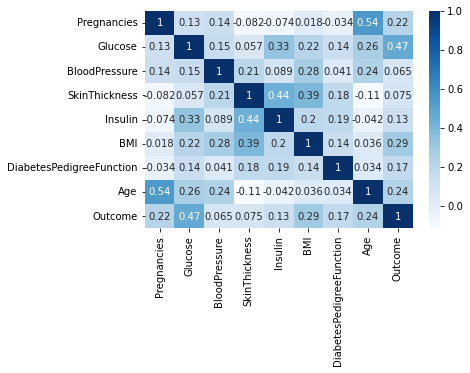

In [432]:
sns.heatmap(df1.corr(),cmap='Blues',annot=True)

In [433]:
x1=df1.iloc[:,:-1]
y1=df1.iloc[:,1]

In [155]:
x1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [156]:
y1

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [170]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [174]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif['variables']=x1.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return[vif]

In [175]:
x1.shape

(768, 8)

In [176]:
calc_vif(x1)

[                  variables  VIF FACTOR
 0               Pregnancies    3.275748
 1                   Glucose   16.725078
 2             BloodPressure   14.619512
 3             SkinThickness    4.008696
 4                   Insulin    2.063689
 5                       BMI   18.408884
 6  DiabetesPedigreeFunction    3.195626
 7                       Age   13.492985]

In [177]:
x1=df1.drop(['BMI'],axis=1)

In [179]:
calc_vif(x1)

[                  variables  VIF FACTOR
 0               Pregnancies    3.358676
 1                   Glucose   15.195818
 2             BloodPressure   12.886425
 3             SkinThickness    3.478699
 4                   Insulin    2.033596
 5  DiabetesPedigreeFunction    3.173804
 6                       Age   13.385077
 7                   Outcome    1.937220]

In [181]:
x1=df1.drop(["BMI","Glucose"],axis=1)

In [182]:
calc_vif(x1)

[                  variables  VIF FACTOR
 0               Pregnancies    3.328589
 1             BloodPressure    9.968702
 2             SkinThickness    3.477590
 3                   Insulin    1.878819
 4  DiabetesPedigreeFunction    3.092398
 5                       Age   11.105697
 6                   Outcome    1.730432]

# Linear Model must have data-----Abalone Final

In [190]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [191]:
# pd.read_csv?

In [276]:
df=pd.read_csv('abalone.csv')

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [194]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [195]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3044,I,0.575,0.445,0.160,0.9175,0.4500,0.1935,0.240,9
4166,I,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.156,10
2261,M,0.585,0.430,0.160,0.9550,0.3625,0.1760,0.270,11


In [197]:
df.tail(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [277]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [278]:
df=pd.DataFrame(data=df)

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [279]:
df.shape

(4177, 9)

In [280]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

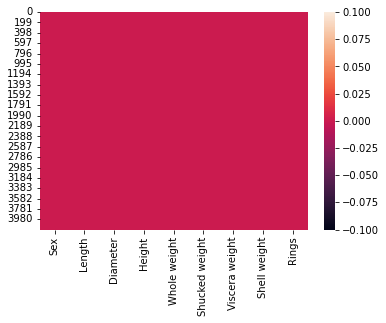

In [281]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

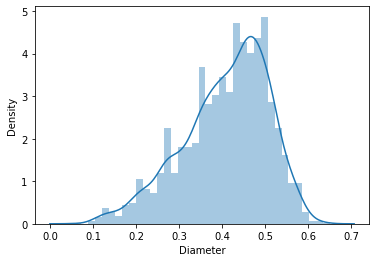

In [282]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

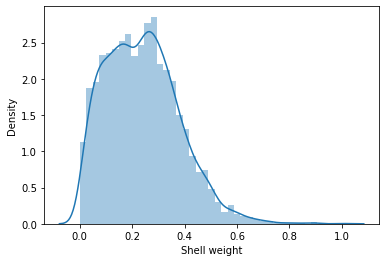

In [283]:
sns.distplot(df['Shell weight'])

In [284]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [285]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [286]:
lencode=LabelEncoder()

df['Sex']=lencode.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


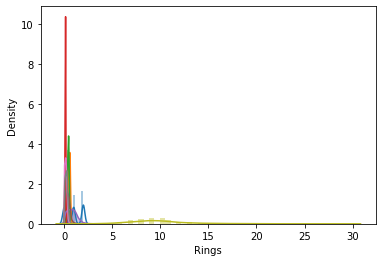

In [287]:
for i in df.columns:
    sns.distplot(df[i])

<AxesSubplot:xlabel='Height', ylabel='Count'>

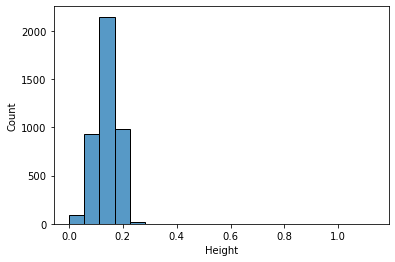

In [288]:
sns.histplot(df['Height'],bins=20)

<AxesSubplot:xlabel='Rings', ylabel='Count'>

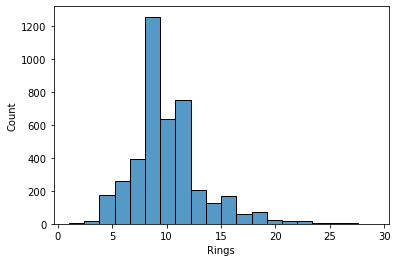

In [289]:
sns.histplot(df['Rings'],bins=20)

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

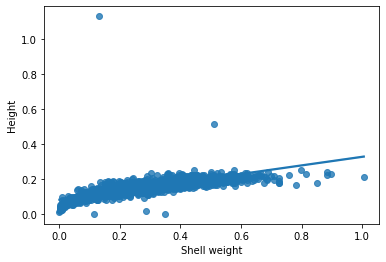

In [290]:
sns.regplot(x='Shell weight',y='Height',data=df)

In [291]:
#sns.kdeplot?

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

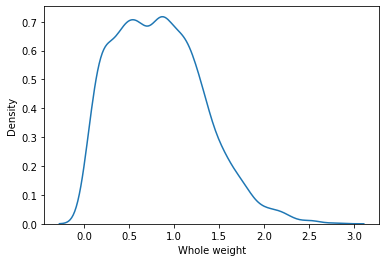

In [292]:
sns.kdeplot(df['Whole weight'])

In [293]:
# sns.regplot?

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

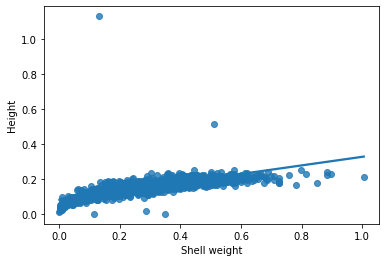

In [294]:
sns.regplot(x="Shell weight",y='Height',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

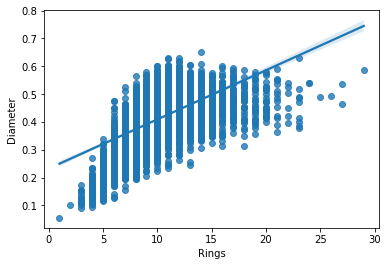

In [295]:
sns.regplot(x='Rings',y="Diameter",data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>

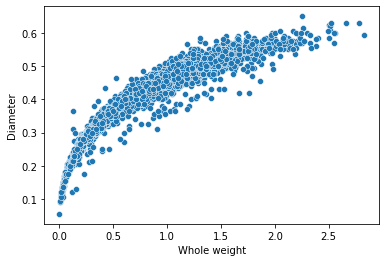

In [296]:
sns.scatterplot(x='Whole weight',y='Diameter',data=df)

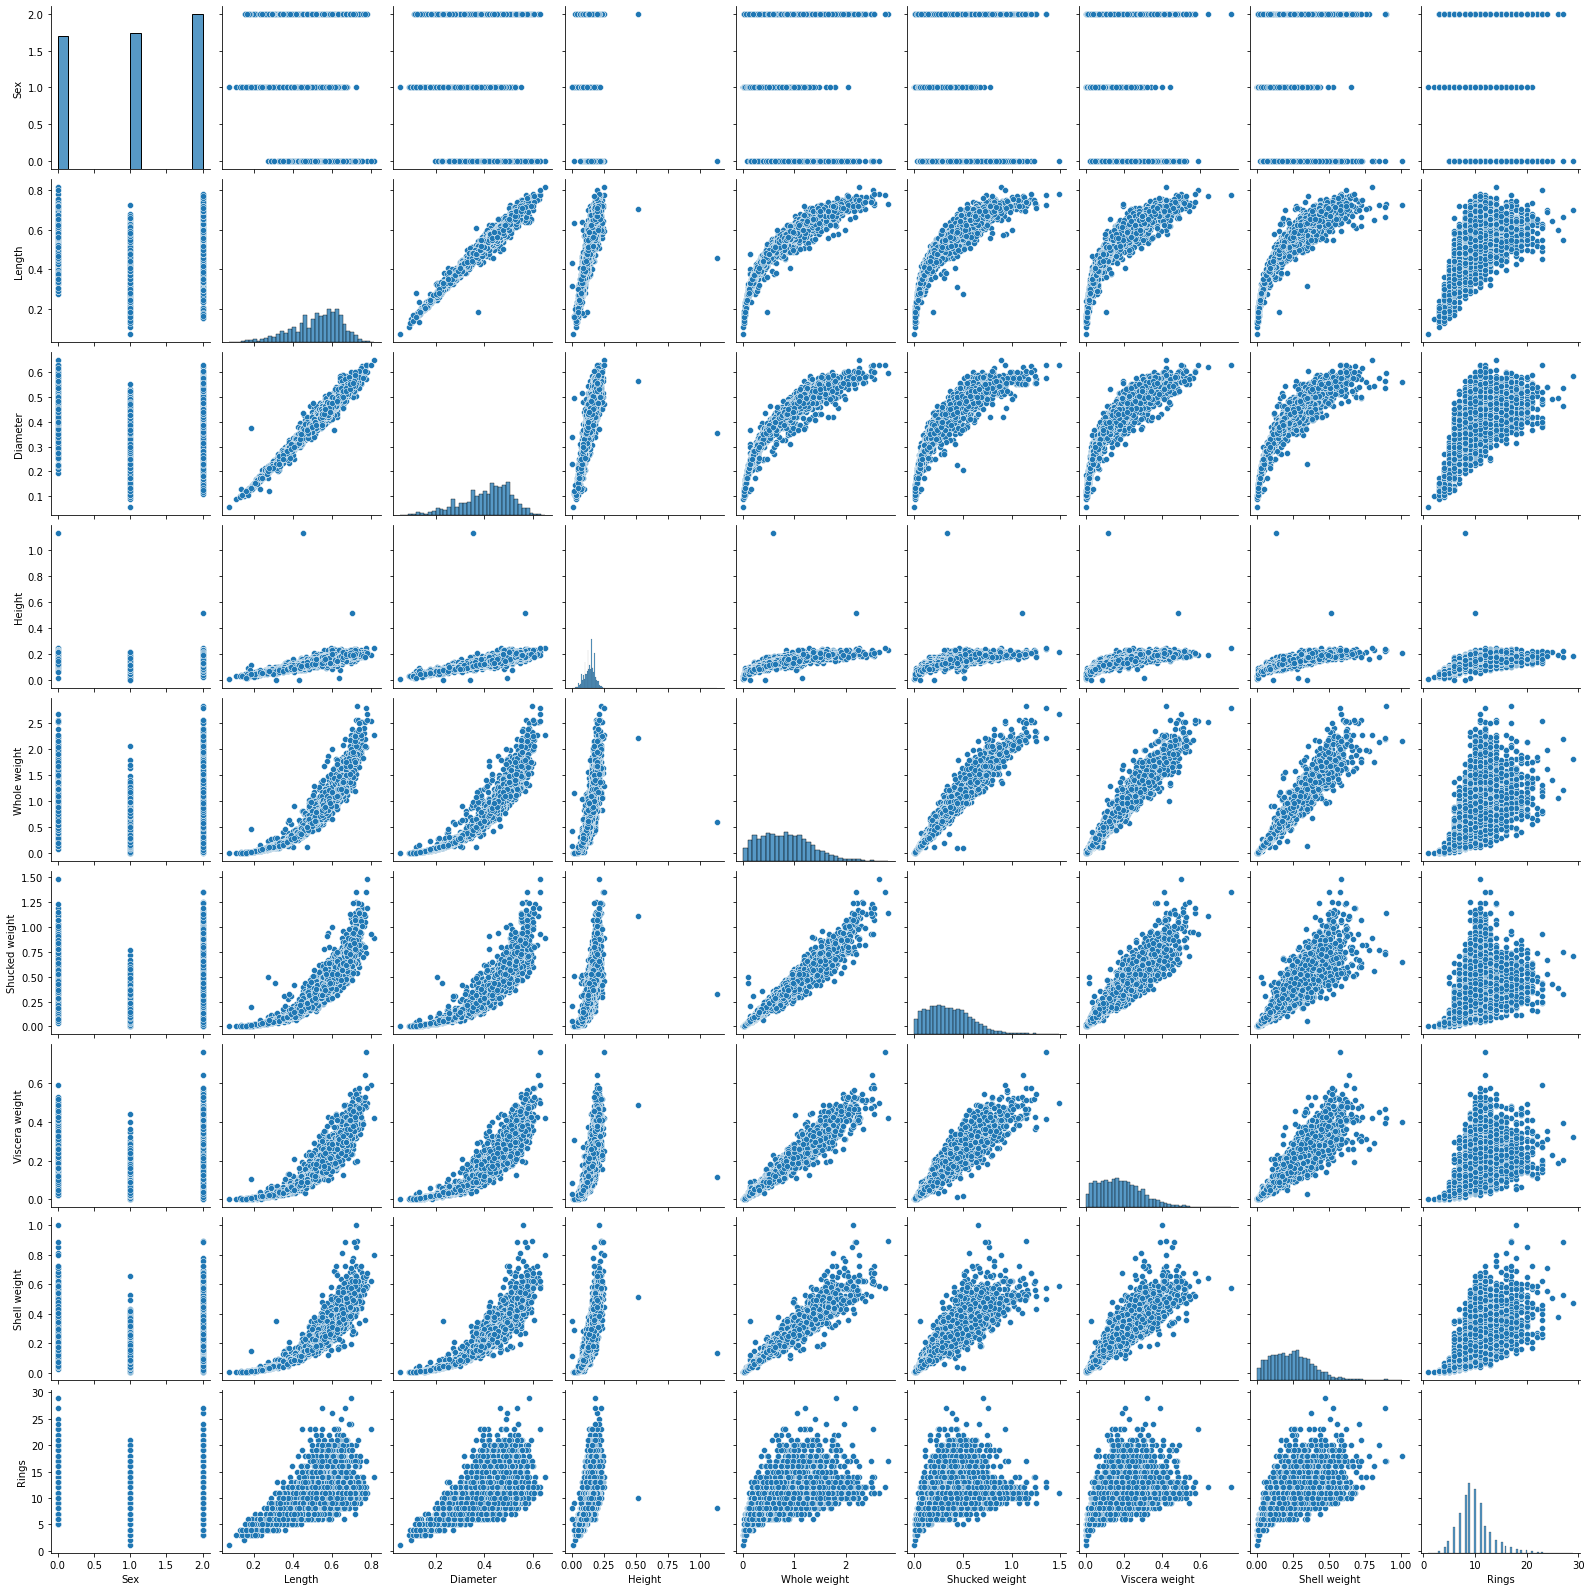

In [297]:
sns.pairplot(df)

In [298]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [299]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [300]:
import numpy as np

In [301]:
df['Height']=np.sqrt(df['Height'])

In [302]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

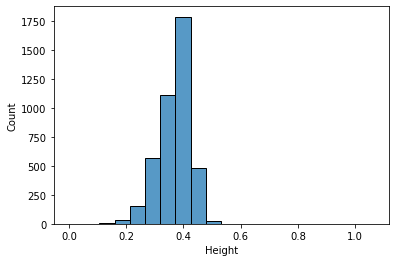

In [303]:
sns.histplot(df['Height'],bins=20)

In [304]:
# detecting outliers

from scipy.stats import zscore

dfzscore = np.abs(zscore(df))

print(np.where(dfzscore>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [305]:
dfnew = df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (4019, 9)


In [307]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043978,-0.046893,-0.047602,-0.034812,-0.016429,-0.045187,-0.043998,-0.033682
Length,-0.043978,1.000000,0.985807,0.907285,0.935022,0.909742,0.908448,0.914874,0.563535
Diameter,-0.046893,0.985807,1.000000,0.912648,0.934606,0.904681,0.904582,0.922138,0.581657
Height,-0.047602,0.907285,0.912648,1.000000,0.882321,0.835174,0.860207,0.889508,0.616311
Whole weight,-0.034812,0.935022,0.934606,0.882321,1.000000,0.970881,0.966476,0.961026,0.545911
Shucked weight,-0.016429,0.909742,0.904681,0.835174,0.970881,1.000000,0.929837,0.895712,0.437522
Viscera weight,-0.045187,0.908448,0.904582,0.860207,0.966476,0.929837,1.000000,0.919089,0.520584
Shell weight,-0.043998,0.914874,0.922138,0.889508,0.961026,0.895712,0.919089,1.000000,0.620817
Rings,-0.033682,0.563535,0.581657,0.616311,0.545911,0.437522,0.520584,0.620817,1.000000


<AxesSubplot:>

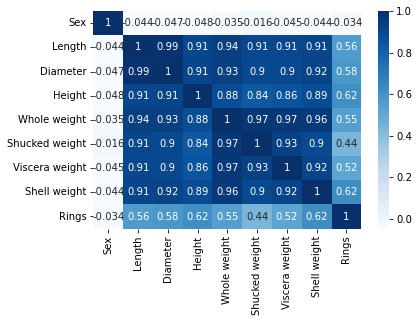

In [308]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

In [309]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [310]:
x=df.iloc[:,0:-1]

In [311]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [312]:
x.shape

(4019, 8)

In [313]:
x.shape[0]

4019

In [314]:
x.shape[1]

8

In [315]:
y=df.iloc[:,-1]

In [316]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4019, dtype: int64

In [317]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [318]:
vif_calc()

   VIF factor        features
0    2.632493             Sex
1  802.340579          Length
2  763.963727        Diameter
3  154.948351          Height
4  441.891678    Whole weight
5  110.275122  Shucked weight
6   65.499021  Viscera weight
7   92.744708    Shell weight


Data Cleansing

detect outliers/remove

In [321]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)

In [322]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.308221,0.5140,0.1010,0.1500,15
1,2,0.265,0.300000,0.2255,0.0485,0.0700,7
2,0,0.420,0.367423,0.6770,0.1415,0.2100,9
3,2,0.365,0.353553,0.5160,0.1140,0.1550,10
4,1,0.255,0.282843,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490,11
4173,2,0.440,0.367423,0.9660,0.2145,0.2605,10
4174,2,0.475,0.452769,1.1760,0.2875,0.3080,9
4175,0,0.485,0.387298,1.0945,0.2610,0.2960,10


In [323]:
x=df.iloc[:,:-1]

In [324]:
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.1500
1,2,0.265,0.300000,0.2255,0.0485,0.0700
2,0,0.420,0.367423,0.6770,0.1415,0.2100
3,2,0.365,0.353553,0.5160,0.1140,0.1550
4,1,0.255,0.282843,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490
4173,2,0.440,0.367423,0.9660,0.2145,0.2605
4174,2,0.475,0.452769,1.1760,0.2875,0.3080
4175,0,0.485,0.387298,1.0945,0.2610,0.2960


In [325]:
vif_calc()

   VIF factor        features
0    2.623184             Sex
1  207.507326        Diameter
2  131.432133          Height
3  140.572357    Whole weight
4   60.762342  Viscera weight
5   58.911776    Shell weight


<AxesSubplot:>

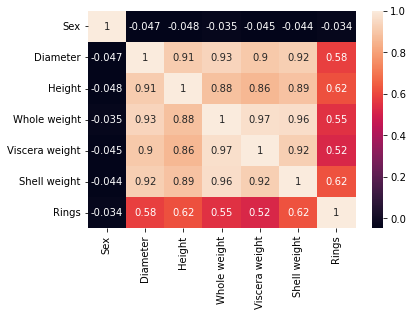

In [326]:
sns.heatmap(df.corr(),annot=True)

In [327]:
x=df.iloc[:,0:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.1500
1,2,0.265,0.300000,0.2255,0.0485,0.0700
2,0,0.420,0.367423,0.6770,0.1415,0.2100
3,2,0.365,0.353553,0.5160,0.1140,0.1550
4,1,0.255,0.282843,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490
4173,2,0.440,0.367423,0.9660,0.2145,0.2605
4174,2,0.475,0.452769,1.1760,0.2875,0.3080
4175,0,0.485,0.387298,1.0945,0.2610,0.2960


In [328]:
x.shape

(4019, 6)

In [331]:
# display rows

x.shape[0]

4019

In [332]:
# display columns

x.shape[1]

6

In [337]:
scale = StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15835802, -0.42766545, -1.1645936 , -0.63693837, -0.7267137 ,
        -0.63462928],
       [ 1.15835802, -1.4770503 , -1.32420851, -1.27043818, -1.23554834,
        -1.26104553],
       [-1.28480172,  0.14949622, -0.01509984, -0.27901646, -0.33418412,
        -0.1648171 ],
       ...,
       [ 1.15835802,  0.72665788,  1.64199279,  0.81670767,  1.08086078,
         0.60254279],
       [-1.28480172,  0.83159637,  0.37079505,  0.63774671,  0.82402043,
         0.50858036],
       [ 1.15835802,  1.56616576,  1.4248959 ,  2.51299401,  1.94345664,
         2.06679076]])

In [338]:
x.shape

(4019, 6)

In [339]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55 )

In [340]:
xtrain.shape

(2813, 6)

In [341]:
xtest.shape

(1206, 6)

In [342]:
ytrain.shape

(2813,)

In [344]:
ytest.shape

(1206,)

In [345]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [346]:
lr.coef_

array([ 0.00840657,  0.36149019,  1.02282032, -2.76538666,  0.13076611,
        3.07787733])

In [347]:
#pd.DataFrame?

In [349]:
features=('Sex','Diameter','Height','Whole weight','Viscera weight','Shell weight')

list(zip(lr.coef_,features))

[(0.008406569042268958, 'Sex'),
 (0.36149018863994875, 'Diameter'),
 (1.0228203212380853, 'Height'),
 (-2.765386661105307, 'Whole weight'),
 (0.13076611122676615, 'Viscera weight'),
 (3.0778773281253824, 'Shell weight')]

In [350]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Sex,0.008407
Diameter,0.361490
Height,1.022820
Whole weight,-2.765387
Viscera weight,0.130766
Shell weight,3.077877


In [351]:
lr.intercept_

9.78026935667521

In [352]:
lr.score(xtrain,ytrain)

0.46367716121560787

In [353]:
pred=lr.predict(xtest)

In [354]:
pred

array([12.11331063, 11.61504384,  9.61650377, ..., 10.38679789,
        9.70195901, 10.88035602])

In [355]:
print('predicted values',pred)

predicted values [12.11331063 11.61504384  9.61650377 ... 10.38679789  9.70195901
 10.88035602]


In [356]:
print('mean absolute error :',mean_absolute_error(ytest,pred))
print('mean squared error:',mean_squared_error(ytest,pred))
print('root mean square:',np.sqrt(mean_squared_error(ytest,pred)))

mean absolute error : 1.5985286611387988
mean squared error: 4.538196137382711
root mean square: 2.130304235874001


In [357]:
print('R2 score:',r2_score(ytest,pred))

R2 score: 0.42899509023721416


In [358]:
t=np.array([2,0.365,0.095,0.5140,0.1010,0.1500])

In [359]:
t

array([2.   , 0.365, 0.095, 0.514, 0.101, 0.15 ])

In [360]:
t.shape

(6,)

In [364]:
t= t.reshape(1,-1)

In [365]:
lr.predict(t)

array([9.07967458])

# Regularization

In [370]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score

In [372]:
rdg=Ridge(alpha=.0001,random_state=45)
rdg.fit(xtrain,ytrain)
rdg.score(xtrain,ytrain)

0.4636771612155063

In [373]:
rdg.coef_

array([ 0.00840652,  0.36148979,  1.02282057, -2.76538155,  0.13076408,
        3.07787431])

In [374]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)

In [375]:
cfdf

,0
Sex,0.008407
Diameter,0.361490
Height,1.022820
Whole weight,-2.765387
Viscera weight,0.130766
Shell weight,3.077877


In [376]:
lso=Lasso(alpha=.0001,random_state=45)
lso.fit(xtrain,ytrain)
lso.score(xtrain,ytrain)

0.46367698288314974

In [377]:
predict1=lso.predict(xtest)

In [379]:
r2_score(ytest,predict1)

0.42904342571409815

# Approacging more regression

In [393]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [398]:
dtr = DecisionTreeRegressor(criterion = 'mse')
dtr.fit(xtrain,ytrain)
print('dtc score:',dtr.score(xtrain,ytrain))

dtrpredict = dtr.predict(xtest)
print('dtc r2_score:',r2_score(ytest,dtrpredict))

print('Mean squared error of dtc:',mean_squared_error(ytest,dtrpredict))
print('Root mean squared error of dtc',np.sqrt(mean_squared_error(ytest,dtrpredict)))

dtc score: 1.0
dtc r2_score: 0.02931353358410027
Mean squared error of dtc: 7.714759535655058
Root mean squared error of dtc 2.777545595603258


In [402]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
print('knr score:',knr.score(xtrain,ytrain))

knrpredict = knr.predict(xtest)
print('knr r2_score:',r2_score(ytest,dtrpredict))

print('Mean squared error of knr:',mean_squared_error(ytest,knrpredict))
print('Root mean squared error of knr',np.sqrt(mean_squared_error(ytest,knrpredict)))

knr score: 0.6336510927605445
knr r2_score: 0.02931353358410027
Mean squared error of knr: 4.886500829187396
Root mean squared error of knr 2.2105431072900155


In [405]:
svr1=SVR()
svr1.fit(xtrain,ytrain)
print('svr1 score:',svr1.score(xtrain,ytrain))

svrpredict = svr1.predict(xtest)
print('svr r2_score:',r2_score(ytest,svrpredict))

print('Mean squared error of svr:',mean_squared_error(ytest,svrpredict))
print('Root mean squared error of svr',np.sqrt(mean_squared_error(ytest,svrpredict)))


svr1 score: 0.4944271700751568
svr r2_score: 0.4699932167972434
Mean squared error of svr: 4.212353861049313
Root mean squared error of svr 2.052401973554234


In [406]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(xtrain,ytrain)
print('sgd score:',sgd.score(xtrain,ytrain))

sgdpredict = sgd.predict(xtest)
print('sgd r2_score:',r2_score(ytest,sgdpredict))

print('Mean squared error of sgd:',mean_squared_error(ytest,sgdpredict))
print('Root mean squared error of sgd',np.sqrt(mean_squared_error(ytest,sgdpredict)))

sgd score: 0.46203946409328067
sgd r2_score: 0.4311917020681659
Mean squared error of sgd: 4.520738046994843
Root mean squared error of sgd 2.126202729514484


# Saving the best model

In [409]:
import joblib
joblib.dump(dtr,'dtrmodel.obj')
dtrloadmodel=joblib.load('dtrmodel.obj')
dtrloadmodel.predict(xtest)


array([11., 11.,  9., ..., 10.,  9.,  9.])